In [ ]:
import numpy as np 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [ ]:
train = pd.read_csv("D:\\Machine Learning Class\\regression\\train.csv")
#test = pd.read_csv("D:\\Machine Learning Class\\regression\\test.csv")

In [3]:
print("Number of Observations in housing dataset:", train.shape)
train.head(2)

Number of Observations in housing dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
print('train df has {} rows and {} features'.format(train.shape[0],train.shape[1]))

train df has 1460 rows and 81 features


In [6]:
pd.isnull(train).any()

#checking for nulls

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [7]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [10]:
#Separate categorical and numerical columns
cat_column = train.dtypes[train.dtypes == 'object']
num_column = train.dtypes[train.dtypes != 'object']

In [11]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [12]:
# Missing Value Handling

def HandleMissingValues(df):
    # for Object columns fill using 'Unknown'
    # for Numeric columns fill using 'median'
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'Unknown'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


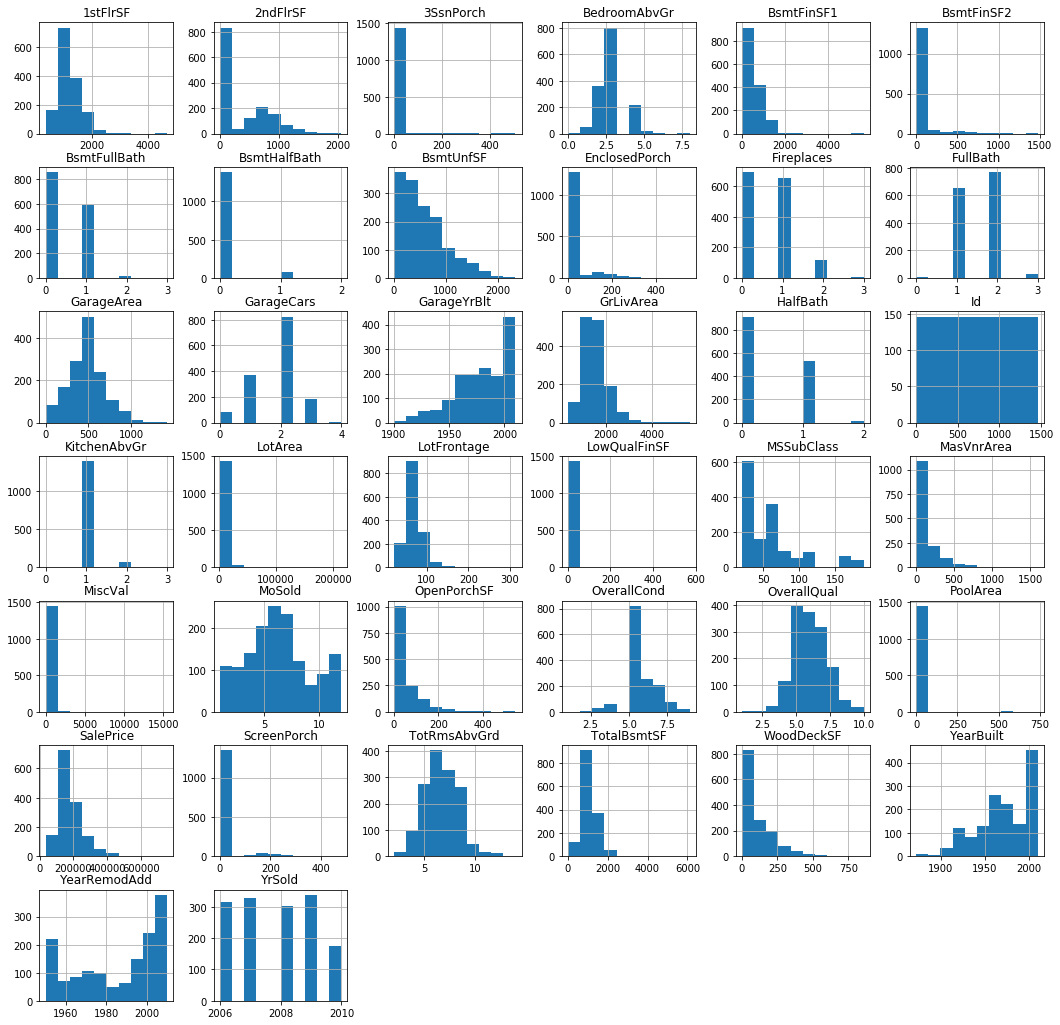

In [13]:
train[list(num_column.index)].hist(figsize = (18,18));

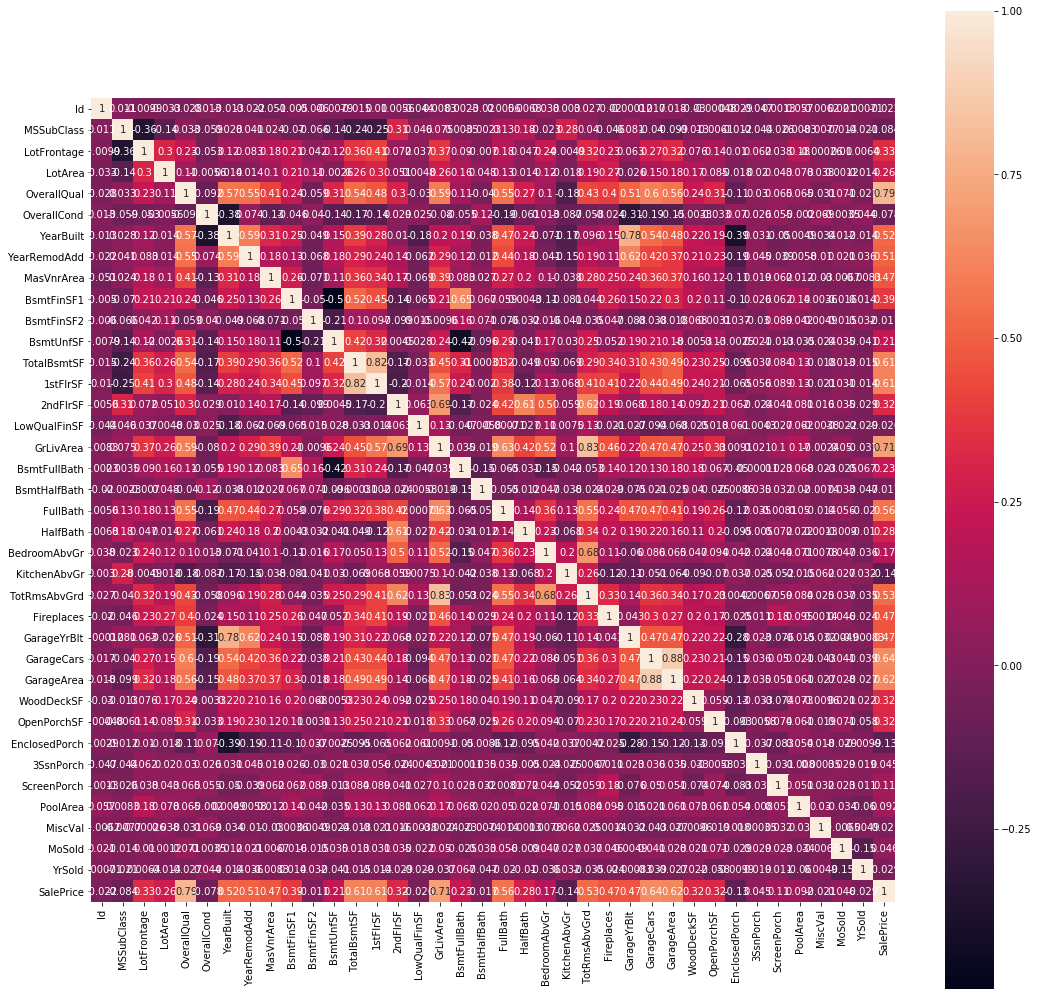

In [14]:
fig = plt.figure(figsize = (18,18))

sns.heatmap(train[list(num_column.index)].corr(),annot = True,square = True);

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) )
        train[col] = le.transform(list(train[col].astype(str).values))

In [16]:
y = train['SalePrice']
train.drop(labels = ['SalePrice'],axis = 1,inplace = True)
X = train

In [17]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4


In [18]:
#I have used Robust scaler because it is not sensitve to outliers

from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

In [19]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

training score: 0.8430060216261815
test score:  0.8327191886203538
r_square: 0.7770766482659935


In [ ]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8,  verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

# KNN Regressor

In [ ]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

In [ ]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

# Polynomial Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
model1 = GridSearchCV(PolynomialRegression(), param_grid,cv=5,scoring='neg_mean_squared_error',verbose=3)

model1.fit(X_train, y_train)
best_parameters = model1.best_params_
print(best_parameters)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, score=-5219834819.434511, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, score=-5436115566.152719, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, score=-8316369279.710521, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__norma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, score=-15551818691.432384, total=   0.2s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, score=-1552237603.4384153, total=   0.2s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, score=-5131875906.312119, total=   0.2s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, score=-1613870663.991839, total=   0.2s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomi

[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2, score=-76108945438.04692, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2, score=-34463077184.037575, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2, score=-515277717026.2959, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0, score=-5219834819.434512, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.5s finished


{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
training score: -1.0619426936392399e-19
test score:  -4860278611.796204
r_square: 0.37655901669347835


In [ ]:
lg.predict(X_test)

# Ridge

In [ ]:
#Without Hyper Parameters Tuning
#Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [ ]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

# Lasso

In [ ]:
#Without Hyper Parameters Tuning
#Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [ ]:
#With Hyper Parameters Tuning and grid search
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

# SVR 

In [ ]:
#Without Hyper Parameters Tuning
#SVR
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=1.0, epsilon=0.2)
model1.fit(X_train,y_train)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))


In [ ]:
#SVR with grid search 

from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf', 'sigmoid'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=8, verbose=2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

In [ ]:
###
#Checking all the models based on its R2 value, test score. We can conclude that Lasso with Gridsearch and Cross validation
# is the best regressor for this dataset

###